# HEALTH INSURANCE LEAD PREDICTION ANN MODEL

In [38]:
# IMPORT THE LIBRARIES
import numpy as np # for numerical computation
import pandas as pd # for data manipulation
import matplotlib.pyplot as plt  # for data visualization
import tensorflow as tf
import seaborn as sns

# PART 1. DATA PREPROCESSING

In [52]:
dataset = pd.read_csv('Machine Problem 1_Rebanal_Princess_Girly_ECE 649_OriginalDataset.csv')
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50882 entries, 0 to 50881
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       50882 non-null  int64  
 1   City_Code                50882 non-null  object 
 2   Region_Code              50882 non-null  int64  
 3   Accomodation_Type        50882 non-null  object 
 4   Reco_Insurance_Type      50882 non-null  object 
 5   Upper_Age                50882 non-null  int64  
 6   Lower_Age                50882 non-null  int64  
 7   Is_Spouse                50882 non-null  object 
 8   Health Indicator         39191 non-null  object 
 9   Holding_Policy_Duration  30631 non-null  object 
 10  Holding_Policy_Type      30631 non-null  float64
 11  Reco_Policy_Cat          50882 non-null  int64  
 12  Reco_Policy_Premium      50882 non-null  float64
 13  Response                 50882 non-null  int64  
dtypes: float64(2), int64(6

In [53]:
# In ‘Health Indicator’, impute all the missing values with the most common values present in the column

dataset["Health Indicator"].fillna(
    dataset["Health Indicator"].mode()[0], inplace=True
)

dataset["Health Indicator"].isnull().sum()

0

In [54]:
# In 'Holding_Policy_Duration' impute all the missing values with the median of the column

dataset["Holding_Policy_Duration"].replace(("14+"), (14.0), inplace=True)
dataset["Holding_Policy_Duration"] = dataset["Holding_Policy_Duration"].astype(
    "float32"
)
dataset["Holding_Policy_Duration"].fillna(
    dataset["Holding_Policy_Duration"].median(), inplace=True
)

dataset["Holding_Policy_Duration"].isnull().sum()

0

In [55]:
# In 'Holding_Policy_Type', replace all the missing valuesi with the most occurring element in the column

dataset["Holding_Policy_Type"].value_counts()
dataset["Holding_Policy_Type"].fillna(
    dataset["Holding_Policy_Type"].mode()[0], inplace=True
)
dataset["Holding_Policy_Type"].isnull().sum()

0

In [56]:
dataset.drop(["ID", "Lower_Age"], axis=1, inplace=True)

In [57]:
dataset["Health Indicator"].replace(
    ["X1", "X2", "X3", "X4", "X5", "X6", "X7", "X8", "X9"],
    [0, 1, 2, 3, 4, 4, 4, 4, 4],
    inplace=True,
)

dataset["City_Code"].replace(
    [
        "C1",
        "C2",
        "C3",
        "C4",
        "C5",
        "C6",
        "C7",
        "C8",
        "C9",
        "C10",
        "C11",
        "C12",
        "C13",
        "C14",
        "C15",
        "C16",
        "C17",
        "C18",
        "C19",
        "C20",
        "C21",
        "C22",
        "C23",
        "C24",
        "C25",
        "C26",
        "C27",
        "C28",
        "C29",
        "C30",
        "C31",
        "C32",
        "C33",
        "C34",
        "C35",
        "C36",
    ],
    [
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        0,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        1,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        2,
        3,
        3,
        3,
        3,
        3,
        3,
    ],
    inplace=True,
)
dataset["Is_Spouse"].replace(["Yes", "No"], [1, 0], inplace=True)
dataset["Reco_Insurance_Type"].replace(
    ["Individual", "Joint"], [1, 0], inplace=True
)
dataset["Accomodation_Type"].replace(["Owned", "Rented"], [0, 1], inplace=True)

<Axes: >

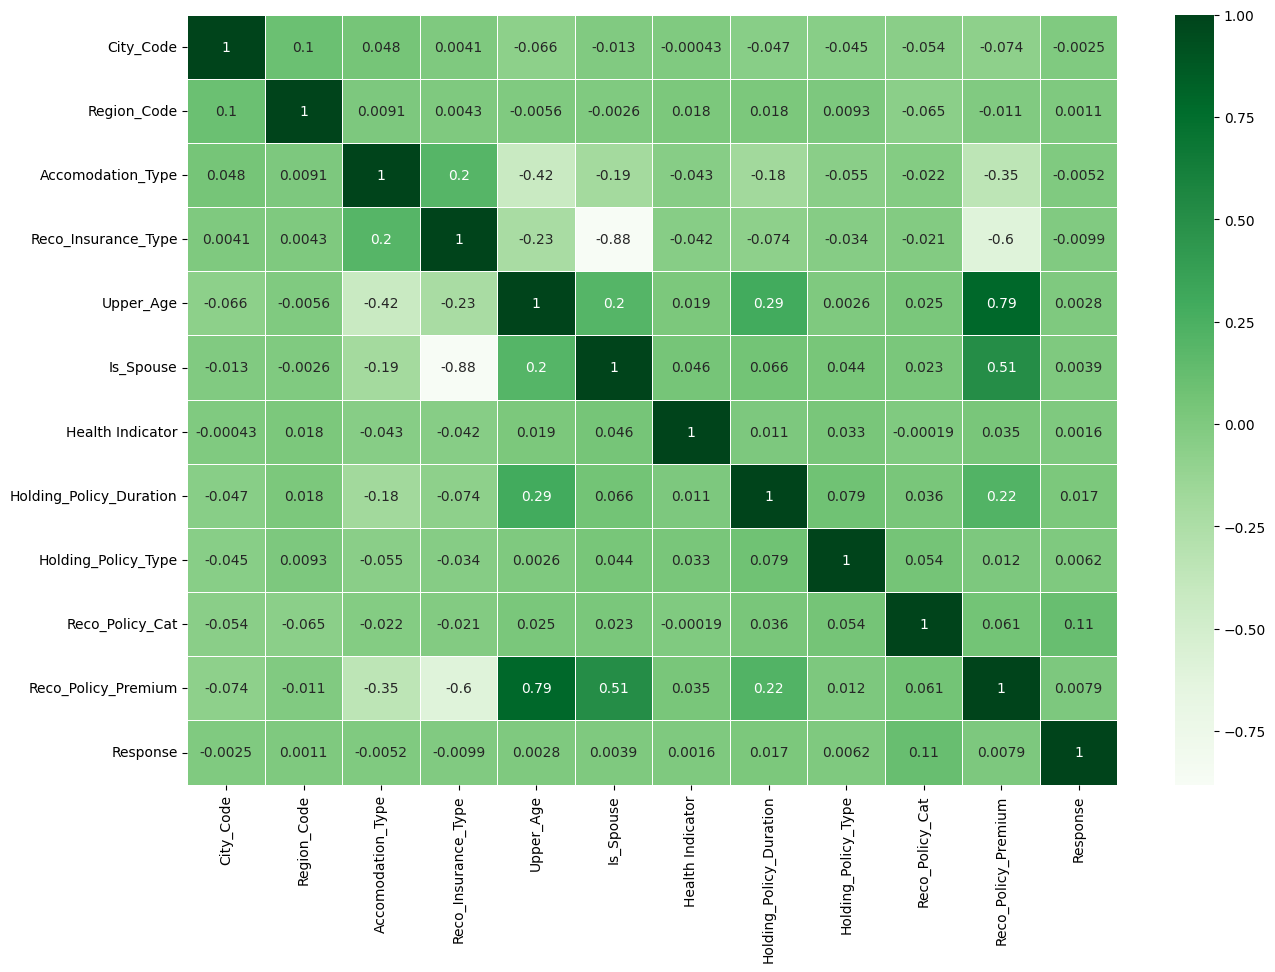

In [58]:
plt.figure(figsize=(15, 10))
corr = dataset.corr()
sns.heatmap(corr, annot=True, linewidths=0.7, cmap="Greens")

In [59]:
X = dataset.drop(["Response"], axis=1)
y = dataset["Response"]

In [60]:
from sklearn.preprocessing import StandardScaler

# Feature scaling
sc = StandardScaler()
X_scale = sc.fit_transform(X)

print("Feature scaling completed.")

Feature scaling completed.


In [61]:
from collections import Counter

from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN

counter = Counter(y)
print("Before", counter)
#
sm = SMOTE(random_state=42)
# sm = ADASYN(random_state=42)
# sm = SMOTETomek(random_state=42)
# sm = SMOTEENN()

X_smote, y_smote = sm.fit_resample(X_scale, y)

counter = Counter(y_smote)
print("Before", counter)

Before Counter({0: 38673, 1: 12209})
Before Counter({0: 38673, 1: 38673})


In [62]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_smote, y_smote, test_size=0.2, random_state=32
)

print(f'Training set size: {X_train.shape[0]} samples')
print(f'Testing set size: {X_test.shape[0]} samples')

Training set size: 61876 samples
Testing set size: 15470 samples


# PART 2. BUILDING THE ARTIFICIAL NEURAL NETWORK MODEL

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

model = RandomForestClassifier(
    n_estimators=500,
    criterion="entropy",
    max_depth=30,
    max_features=X_train.shape[1],
    verbose=2,
)

model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 30,
 'max_features': 11,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 2,
 'warm_start': False}

# PART 3. TRAINING THE ARTIFICIAL NEURAL NETWORK MODEL

In [71]:
model.fit(X_train, y_train)

building tree 1 of 500
building tree 2 of 500
building tree 3 of 500
building tree 4 of 500
building tree 5 of 500
building tree 6 of 500
building tree 7 of 500
building tree 8 of 500
building tree 9 of 500
building tree 10 of 500
building tree 11 of 500
building tree 12 of 500
building tree 13 of 500
building tree 14 of 500
building tree 15 of 500
building tree 16 of 500
building tree 17 of 500
building tree 18 of 500
building tree 19 of 500
building tree 20 of 500
building tree 21 of 500
building tree 22 of 500
building tree 23 of 500
building tree 24 of 500
building tree 25 of 500
building tree 26 of 500
building tree 27 of 500
building tree 28 of 500
building tree 29 of 500
building tree 30 of 500
building tree 31 of 500
building tree 32 of 500
building tree 33 of 500
building tree 34 of 500
building tree 35 of 500
building tree 36 of 500
building tree 37 of 500
building tree 38 of 500
building tree 39 of 500
building tree 40 of 500


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   14.8s


building tree 41 of 500
building tree 42 of 500
building tree 43 of 500
building tree 44 of 500
building tree 45 of 500
building tree 46 of 500
building tree 47 of 500
building tree 48 of 500
building tree 49 of 500
building tree 50 of 500
building tree 51 of 500
building tree 52 of 500
building tree 53 of 500
building tree 54 of 500
building tree 55 of 500
building tree 56 of 500
building tree 57 of 500
building tree 58 of 500
building tree 59 of 500
building tree 60 of 500
building tree 61 of 500
building tree 62 of 500
building tree 63 of 500
building tree 64 of 500
building tree 65 of 500
building tree 66 of 500
building tree 67 of 500
building tree 68 of 500
building tree 69 of 500
building tree 70 of 500
building tree 71 of 500
building tree 72 of 500
building tree 73 of 500
building tree 74 of 500
building tree 75 of 500
building tree 76 of 500
building tree 77 of 500
building tree 78 of 500
building tree 79 of 500
building tree 80 of 500
building tree 81 of 500
building tree 82

[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:  1.0min


building tree 162 of 500
building tree 163 of 500
building tree 164 of 500
building tree 165 of 500
building tree 166 of 500
building tree 167 of 500
building tree 168 of 500
building tree 169 of 500
building tree 170 of 500
building tree 171 of 500
building tree 172 of 500
building tree 173 of 500
building tree 174 of 500
building tree 175 of 500
building tree 176 of 500
building tree 177 of 500
building tree 178 of 500
building tree 179 of 500
building tree 180 of 500
building tree 181 of 500
building tree 182 of 500
building tree 183 of 500
building tree 184 of 500
building tree 185 of 500
building tree 186 of 500
building tree 187 of 500
building tree 188 of 500
building tree 189 of 500
building tree 190 of 500
building tree 191 of 500
building tree 192 of 500
building tree 193 of 500
building tree 194 of 500
building tree 195 of 500
building tree 196 of 500
building tree 197 of 500
building tree 198 of 500
building tree 199 of 500
building tree 200 of 500
building tree 201 of 500


[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:  2.3min


building tree 365 of 500
building tree 366 of 500
building tree 367 of 500
building tree 368 of 500
building tree 369 of 500
building tree 370 of 500
building tree 371 of 500
building tree 372 of 500
building tree 373 of 500
building tree 374 of 500
building tree 375 of 500
building tree 376 of 500
building tree 377 of 500
building tree 378 of 500
building tree 379 of 500
building tree 380 of 500
building tree 381 of 500
building tree 382 of 500
building tree 383 of 500
building tree 384 of 500
building tree 385 of 500
building tree 386 of 500
building tree 387 of 500
building tree 388 of 500
building tree 389 of 500
building tree 390 of 500
building tree 391 of 500
building tree 392 of 500
building tree 393 of 500
building tree 394 of 500
building tree 395 of 500
building tree 396 of 500
building tree 397 of 500
building tree 398 of 500
building tree 399 of 500
building tree 400 of 500
building tree 401 of 500
building tree 402 of 500
building tree 403 of 500
building tree 404 of 500


RandomForestClassifier(criterion='entropy', max_depth=30, max_features=11,
                       n_estimators=500, verbose=2)

# PART 4. MAKING PREDICTIONS AND EVALUATING THE ANN MODEL


In [72]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    0.0s
[Parallel(n_jobs=1)]: Done 161 tasks      | elapsed:    0.3s
[Parallel(n_jobs=1)]: Done 364 tasks      | elapsed:    0.7s


              precision    recall  f1-score   support

           0       0.78      0.90      0.84      7725
           1       0.88      0.75      0.81      7745

    accuracy                           0.83     15470
   macro avg       0.83      0.83      0.83     15470
weighted avg       0.83      0.83      0.83     15470



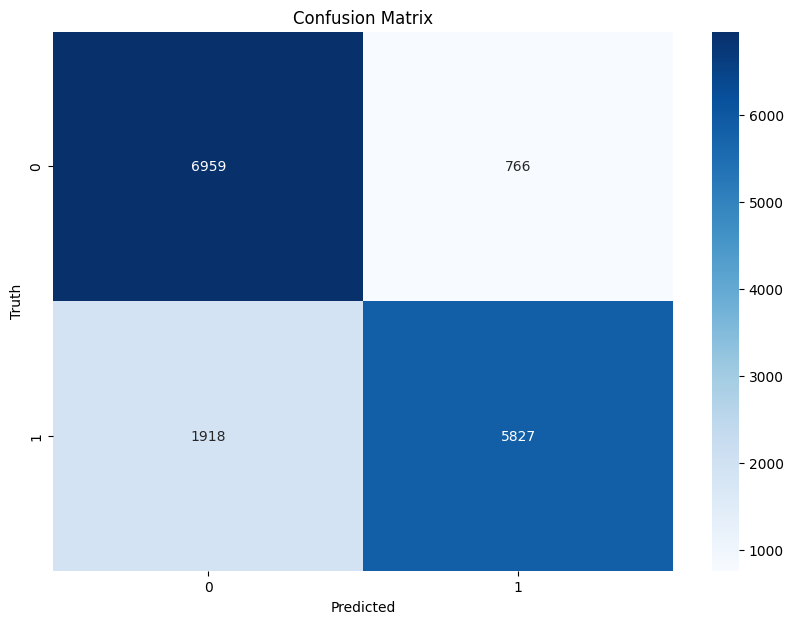

In [73]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Truth")
plt.title("Confusion Matrix")
plt.show()

# PART 5: PERFORM K-FOLD CROSS-VALIDATION TO ASSESS THE PERFORMANCE OF THE ANN MODEL


### A. To Feature Scale the X Variable Using the StandardScaler


In [13]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_standard = X.copy()
X_standard = sc.fit_transform(X_standard)

### B. Build the ANN Classifier Using the KerasClassifier


In [19]:
from scikeras.wrappers import KerasClassifier

# Function to build the ANN model
def build_classifier():
    model = Sequential()

    model.add(Input(shape=(X_train_sm.shape[1],)))
    model.add(Dense(units=6, activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Create the Keras classifier
classifier = KerasClassifier(model=build_classifier, batch_size=32, epochs=50)

### C. Import the **StratifiedKFold** Class


In [20]:
from sklearn.model_selection import StratifiedKFold

kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

### D. Import the **cross_val_score** Class


In [21]:
from sklearn.model_selection import cross_val_score

### E. Perform the k-Fold Cross Validation


#### E.1 Using **Accuracy** as the Scoring Metric for Cross-Valdiation


In [22]:
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)

accuracies = cross_val_score(estimator=classifier, X=X_standard, y=y, cv=kfold, scoring='accuracy')

print(f"Accuracy Mean: {accuracies.mean()}, Accuracy Standard Deviation: {accuracies.std()}")

Epoch 1/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 543us/step - accuracy: 0.7005 - loss: 0.6005
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 514us/step - accuracy: 0.7579 - loss: 0.5497
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 500us/step - accuracy: 0.7622 - loss: 0.5426
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 515us/step - accuracy: 0.7593 - loss: 0.5444
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 622us/step - accuracy: 0.7622 - loss: 0.5405
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.7602 - loss: 0.5430
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 495us/step - accuracy: 0.7555 - loss: 0.5482
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.7583 - loss: 0.5449
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.7632 - loss: 0.5389
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 698us/step - accuracy: 0.7622 - loss: 0.5407
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 595us/step - accuracy: 0.7557 - loss: 0.5473
Epoch 12

#### E.2 Using **F1-Score** as the Scoring Metric for Cross-Valdiation


In [23]:
f1_scores = cross_val_score(estimator=classifier, X=X_standard, y=y, cv=kfold, scoring='f1')

print(f"F1-Score Mean: {f1_scores.mean()}, F1-Score Standard Deviation: {f1_scores.std()}")

Epoch 1/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 2s 803us/step - accuracy: 0.6823 - loss: 0.6245
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 693us/step - accuracy: 0.7590 - loss: 0.5510
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.7599 - loss: 0.5466
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 537us/step - accuracy: 0.7607 - loss: 0.5431
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 520us/step - accuracy: 0.7604 - loss: 0.5434
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 501us/step - accuracy: 0.7617 - loss: 0.5411
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 550us/step - accuracy: 0.7607 - loss: 0.5416
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 526us/step - accuracy: 0.7589 - loss: 0.5436
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 508us/step - accuracy: 0.7602 - loss: 0.5422
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.7606 - loss: 0.5407
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step - accuracy: 0.7611 - loss: 0.5412
Epoch 12

#### E.3 Using **Precision** as the Scoring Metric for Cross-Valdiation


In [24]:
precisions = cross_val_score(estimator=classifier, X=X_standard, y=y, cv=kfold, scoring='precision')

print(f"Precision Mean: {precisions.mean()}, Precision Standard Deviation: {precisions.std()}")

Epoch 1/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.7235 - loss: 0.5935
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.7617 - loss: 0.5457
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.7601 - loss: 0.5456
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.7576 - loss: 0.5480
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.7589 - loss: 0.5460
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.7600 - loss: 0.5441
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.7600 - loss: 0.5427
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.7609 - loss: 0.5411
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.7599 - loss: 0.5429
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.7614 - loss: 0.5409
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.7589 - loss: 0.5428
Epoch 12

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 524us/step - accuracy: 0.7286 - loss: 0.5873
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.7613 - loss: 0.5475
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.7598 - loss: 0.5459
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.7573 - loss: 0.5477
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.7607 - loss: 0.5434
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - accuracy: 0.7594 - loss: 0.5441
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.7616 - loss: 0.5412
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - accuracy: 0.7615 - loss: 0.5405
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.7611 - loss: 0.5406
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - accuracy: 0.7612 - loss: 0.5412
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 497us/step - accuracy: 0.7615 - loss: 0.5399
Epoch 12/50
1432/14

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.6768 - loss: 0.6139
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7619 - loss: 0.5470
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.7575 - loss: 0.5486
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.7580 - loss: 0.5479
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.7610 - loss: 0.5436
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.7640 - loss: 0.5387
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.7617 - loss: 0.5415
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - accuracy: 0.7626 - loss: 0.5390
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 445us/step - accuracy: 0.7594 - loss: 0.5429
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.7616 - loss: 0.5400
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.7616 - loss: 0.5394
Epoch 12/50
1432/14

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.6404 - loss: 0.6457
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.7632 - loss: 0.5465
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.7609 - loss: 0.5442
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.7593 - loss: 0.5449
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.7567 - loss: 0.5462
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.7624 - loss: 0.5384
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.7620 - loss: 0.5385
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.7607 - loss: 0.5391
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.7606 - loss: 0.5400
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.7652 - loss: 0.5341
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.7604 - loss: 0.5390
Epoch 12/50
1432/14

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.7010 - loss: 0.6063
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.7598 - loss: 0.5507
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.7596 - loss: 0.5465
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.7623 - loss: 0.5426
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 441us/step - accuracy: 0.7595 - loss: 0.5443
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.7570 - loss: 0.5473
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.7606 - loss: 0.5425
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.7604 - loss: 0.5424
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.7611 - loss: 0.5408
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - accuracy: 0.7570 - loss: 0.5454
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.7579 - loss: 0.5455
Epoch 12/50
1432/14

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.6045 - loss: 0.7254
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.7630 - loss: 0.5515
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 427us/step - accuracy: 0.7611 - loss: 0.5456
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.7593 - loss: 0.5459
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.7625 - loss: 0.5412
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 447us/step - accuracy: 0.7564 - loss: 0.5479
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.7604 - loss: 0.5437
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.7603 - loss: 0.5437
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 503us/step - accuracy: 0.7605 - loss: 0.5436
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.7587 - loss: 0.5454
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 425us/step - accuracy: 0.7594 - loss: 0.5443
Epoch 12/50
1432/14

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 436us/step - accuracy: 0.6915 - loss: 0.6190
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.7634 - loss: 0.5417
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 428us/step - accuracy: 0.7589 - loss: 0.5458
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.7594 - loss: 0.5445
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.7591 - loss: 0.5456
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.7577 - loss: 0.5435
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.7610 - loss: 0.5413
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.7609 - loss: 0.5412
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - accuracy: 0.7616 - loss: 0.5406
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.7626 - loss: 0.5384
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.7583 - loss: 0.5447
Epoch 12/50
1432/14

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.6751 - loss: 0.6234
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.7591 - loss: 0.5484
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.7645 - loss: 0.5397
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.7599 - loss: 0.5458
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 426us/step - accuracy: 0.7600 - loss: 0.5445
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 431us/step - accuracy: 0.7621 - loss: 0.5412
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.7608 - loss: 0.5418
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.7596 - loss: 0.5424
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 421us/step - accuracy: 0.7605 - loss: 0.5431
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.7621 - loss: 0.5400
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - accuracy: 0.7626 - loss: 0.5392
Epoch 12/50
1432/14

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.5661 - loss: 0.7587
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 432us/step - accuracy: 0.7604 - loss: 0.5503
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.7548 - loss: 0.5520
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.7610 - loss: 0.5441
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.7600 - loss: 0.5438
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.7597 - loss: 0.5441
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.7577 - loss: 0.5444
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.7605 - loss: 0.5432
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 434us/step - accuracy: 0.7571 - loss: 0.5471
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.7587 - loss: 0.5449
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 430us/step - accuracy: 0.7607 - loss: 0.5421
Epoch 12/50
1432/14

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - accuracy: 0.7358 - loss: 0.5875
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 435us/step - accuracy: 0.7597 - loss: 0.5469
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.7627 - loss: 0.5416
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 433us/step - accuracy: 0.7627 - loss: 0.5404
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 440us/step - accuracy: 0.7598 - loss: 0.5433
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - accuracy: 0.7603 - loss: 0.5425
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - accuracy: 0.7612 - loss: 0.5416
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.7600 - loss: 0.5418
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 439us/step - accuracy: 0.7583 - loss: 0.5451
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 438us/step - accuracy: 0.7580 - loss: 0.5449
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.7600 - loss: 0.5409
Epoch 12/50
1432/14

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


#### E.4 Using **Recall** as the Scoring Metric for Cross-Valdiation


In [25]:
recalls = cross_val_score(estimator=classifier, X=X_standard, y=y, cv=kfold, scoring='recall')

print(f"Recall Mean: {recalls.mean()}, Recall Standard Deviation: {recalls.std()}")

Epoch 1/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.5577 - loss: 0.7323
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 475us/step - accuracy: 0.7578 - loss: 0.5557
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.7590 - loss: 0.5464
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 454us/step - accuracy: 0.7548 - loss: 0.5507
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.7622 - loss: 0.5416
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7626 - loss: 0.5417
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.7651 - loss: 0.5375
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 455us/step - accuracy: 0.7643 - loss: 0.5382
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 450us/step - accuracy: 0.7597 - loss: 0.5437
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.7599 - loss: 0.5430
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 442us/step - accuracy: 0.7617 - loss: 0.5406
Epoch 12

#### E.5 Using ROC-AUC as the Scoring Metric for Cross-Valdiation


In [26]:
roc_aucs = cross_val_score(estimator=classifier, X=X_standard, y=y, cv=kfold, scoring='roc_auc')

print(f"ROC-AUC Mean: {roc_aucs.mean()}, ROC-AUC Standard Deviation: {roc_aucs.std()}")

Epoch 1/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.6988 - loss: 0.6154
Epoch 2/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 443us/step - accuracy: 0.7602 - loss: 0.5479
Epoch 3/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 437us/step - accuracy: 0.7583 - loss: 0.5475
Epoch 4/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.7615 - loss: 0.5424
Epoch 5/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7605 - loss: 0.5428
Epoch 6/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 444us/step - accuracy: 0.7575 - loss: 0.5456
Epoch 7/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.7575 - loss: 0.5451
Epoch 8/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7609 - loss: 0.5405
Epoch 9/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.7602 - loss: 0.5411
Epoch 10/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.7570 - loss: 0.5442
Epoch 11/50
1432/1432 ━━━━━━━━━━━━━━━━━━━━ 1s 449us/step - accuracy: 0.7604 - loss: 0.5401
Epoch 12

# PART 6. PERFORM HOLD-OUT VALIDATION TO ASSESS THE ARTIFICIAL NEURAL NETWORK MODEL'S PERFORMANCE


In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve, classification_report

TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

### A. For Classification Accuracy


In [28]:
accuracy = accuracy_score(y_test, y_pred)

print(f"Classification Accuracy: {accuracy}")

Classification Accuracy: 0.24162326815367988


### B. For Classification Error


In [29]:
classification_error = 1 - accuracy

print(f"Classification Error: {classification_error}")

Classification Error: 0.7583767318463202


### C. For the Sensitivity, Recall Score, Probability of Detection, True Positive Rate


In [30]:
sensitivity = recall_score(y_test, y_pred)

print(f"Sensitivity / Recall / True Positive Rate: {sensitivity}")

Sensitivity / Recall / True Positive Rate: 1.0


### D. For the Specificity or True Negative Rate


In [31]:
specificity = TN / float(TN + FP)

print(f"Specificity / True Negative Rate: {specificity}")

Specificity / True Negative Rate: 0.00012955045990413266


### E. For the False Positive Rates


In [32]:
false_positive_rate = FP / float(TN + FP)

print(f"False Positive Rate: {false_positive_rate}")

False Positive Rate: 0.9998704495400959


### F. For the Precision or Positive Predictive Value


In [33]:
precision = precision_score(y_test, y_pred)

print(f"Precision / Positive Predictive Value: {precision}")

Precision / Positive Predictive Value: 0.24154874213836477


### G. For the F1-Score


In [34]:
f1 = f1_score(y_test, y_pred)

print(f"F1-Score: {f1}")

F1-Score: 0.38910875415545354


### H. For the Classification Report

In [35]:
# already printed in Part 4, included here for completeness
print("Classification Report:")

print(cr)

Classification Report:


NameError: name 'cr' is not defined

### I. For the Precision-Recall Curve

In [ ]:
precision_vals, recall_vals, threshold = precision_recall_curve(y_test, y_pred)

plt.figure(figsize=(10, 7))
plt.plot(recall_vals, precision_vals, marker='.')

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.title('Precision-Recall Curve')

plt.show()

### J. For the ROC Curve with AUC

#### J.1 For the Receiver Operating Curve (ROC)

In [ ]:
fpr, tpr, threshold = roc_curve(y_test, y_pred)

#### J.2 For the Area Under the Curve (AUC)


In [ ]:
roc_auc = roc_auc_score(y_test, y_pred)

#### J.3 To Plot the ROC Curve with AUC

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve')

plt.legend(loc='lower right')

plt.show()

#### J.4 For the Plot of Baseline for AUC


In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Baseline')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('Receiver Operating Characteristic (ROC) Curve with Baseline')

plt.legend(loc='lower right')

plt.show()

# PART 7. PERFORM HYPERPARAMETER TUNING TO OPTIMIZE THE ARTIFICIAL NEURAL NETWORK MODEL

In [ ]:
from sklearn.model_selection import GridSearchCV
from scikeras.wrappers import KerasClassifier 

### A. Tune First the Batch Size and Epochs


#### A.1 Build the ANN Model for the Optimization Process


In [ ]:
def build_classifier(batch_size=32, epochs=100):
    model = Sequential()

    model.add(Input(shape=(X_train_sm.shape[1],)))
    model.add(Dense(units=6, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

#### A.2 To Import gridSearchCV Class and Optimize the Parameter

In [ ]:
# Define the grid of hyperparameters
parameters = {
    'batch_size': [25, 32],
    'epochs': [100, 200]
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier,
													param_grid=parameters, 
													scoring='accuracy', 
													cv=10)

# Fit the GridSearchCV object to the data
grid_search = grid_search.fit(X_train_sm, y_train_sm)

print(grid_search)

#### B.1 Build the ANN Model for the Optimization Process

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

### B. Tune Next the Optimizer


#### B.1 Build the ANN Model for the Optimization Process

In [ ]:
def build_classifier(optimizer='adam'):
    model = Sequential()

    model.add(Input(shape=(X_train_sm.shape[1],)))
    model.add(Dense(units=6, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

#### B.2 To Import gridSearchCV Class and Optimize the Parameter

In [ ]:
# Create the Keras classifier
classifier = KerasClassifier(model=build_classifier, 
														 batch_size=best_parameters['batch_size'], 
														 epochs=best_parameters['epochs'])

In [ ]:
# Define the grid of hyperparameters
parameters = {
    'optimizer': ['adam', 'rmsprop']
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, 
													 param_grid=parameters, 
													 scoring='accuracy', 
													 cv=10)

# Fit the GridSearchCV object to the data
grid_search = grid_search.fit(X_train_sm, y_train_sm)

print(grid_search)

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

### C. Tune Next the Optimizer's Learning Rate and Momentum


#### C.1 Build the ANN Model for the Optimization Process


In [166]:
from keras.optimizers import Adam, RMSprop

In [167]:
def build_classifier(optimizer):
    model = Sequential()

    model.add(Input(shape=(X_train_sm.shape[1],)))
    model.add(Dense(units=6, activation="relu"))
    model.add(Dense(units=1, activation="sigmoid"))
    
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [168]:
classifier = KerasClassifier(model=build_classifier, 
														 batch_size=best_parameters['batch_size'], 
														 epochs=best_parameters['epochs'])

KeyError: 'batch_size'

#### C.2 To Import gridSearchCV Class and Optimize the Parameter


In [ ]:
# Define the grid of hyperparameters
parameters = {
    "optimizer": [
        Adam(learning_rate=0.01),
        Adam(learning_rate=0.001),
        RMSprop(learning_rate=0.01, momentum=0.9),
        RMSprop(learning_rate=0.001, momentum=0.9),
    ]
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(
    estimator=classifier, param_grid=parameters, scoring="accuracy", cv=10
)

# Fit the GridSearchCV object to the data
grid_search = grid_search.fit(X_train_sm, y_train_sm)

print(grid_search)

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

### D. Tune Next the Network's Weight Initialization


#### D.1 Build the ANN Model for the Optimization Process


In [ ]:
from keras.initializers import RandomNormal, HeNormal

In [ ]:
def build_classifier(kernel_initializer='glorot_uniform'):
    model = Sequential()

    model.add(
        Input(shape=(X_train_sm.shape[1],), kernel_initializer=kernel_initializer)
    )
    model.add(Dense(units=6, activation="relu", kernel_initializer=kernel_initializer))
    model.add(
        Dense(units=1, activation="sigmoid", kernel_initializer=kernel_initializer)
    )

    model.compile(optimizer=best_parameters['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(model=build_classifier, batch_size=best_parameters['batch_size'], epochs=best_parameters['epochs'])

#### D.2 To Import gridSearchCV Class and Optimize the Parameter


In [ ]:
# Define the grid of hyperparameters
parameters = {
    'kernel_initializer': ['glorot_uniform', 'normal', HeNormal()]
}



In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, 
													 param_grid=parameters, 
													 scoring='accuracy', 
													 cv=10)

# Fit the GridSearchCV object to the data
grid_search = grid_search.fit(X_train_sm, y_train_sm)

print(grid_search)

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

### E. Tune Next the Neuron Activation Function


#### E.1 Build the ANN Model for the Optimization Process


In [ ]:
def build_classifier(activation='relu'):
    model = Sequential()

    model.add(Input(shape=(X_train_sm.shape[1],)))
    model.add(Dense(units=6, activation=activation))
    model.add(Dense(units=1, activation="sigmoid"))
    
    model.compile(optimizer=best_parameters['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(model=build_classifier, batch_size=best_parameters['batch_size'], epochs=best_parameters['epochs'])

#### E.2 To Import gridSearchCV Class and Optimize the Parameter


In [ ]:
# Define the grid of hyperparameters
parameters = {
    'activation': ['relu', 'tanh', 'sigmoid']
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

In [ ]:
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

### F. Tune Next the Dropout Regularization


#### F.1 Build the ANN Model for the Optimizer Process


In [ ]:
from keras.layers import Dropout

In [ ]:
def build_classifier(dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(units=6, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=6, activation='relu'))
    model.add(Dropout(rate=dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=best_parameters['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(model=build_classifier, 
														 batch_size=best_parameters['batch_size'], 
														 epochs=best_parameters['epochs'])


#### F.2 To Import GridSearchCV Class and Optimize the Parameter


In [ ]:
# Define the grid of hyperparameters
parameters = {
    'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

### G. Tune Next the Number of Neurons in the Hidden Layer


#### G.1 Build the ANN Model for the Optimizer Process


In [ ]:
def build_classifier(neurons=6):
    model = Sequential()
    model.add(Dense(units=neurons, activation='relu', input_dim=X_train.shape[1]))
    model.add(Dense(units=neurons, activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    model.compile(optimizer=best_parameters['optimizer'], loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [ ]:
classifier = KerasClassifier(model=build_classifier, 
														 batch_size=best_parameters['batch_size'], 
														 epochs=best_parameters['epochs'])


#### G.1 Build the ANN Model for the Optimizer Process


In [ ]:
# Define the grid of hyperparameters
parameters = {
    'neurons': [6, 12, 24, 48, 64]
}

In [ ]:
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=classifier, param_grid=parameters, scoring='accuracy', cv=10)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

# Part 8 - Use the New Improved Model

### A. Build and Train the ANN Model with the best parameters

### B. Making Predictions and evaluating the new ANN Model

### C. Perform K-Fold Cross-validation

### D. Perform Hold-out Validation

# Experiments

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

### Random Forest Classifier

#### Tune to get the best parameters using Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
model = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the model
grid_search = grid_search.fit(X_train_sm, y_train_sm)

print(grid_search)

In [ ]:
# Get the best parameters and best score
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

print(f"Best Parameters: {best_parameters}")
print(f"Best Accuracy: {best_accuracy}")

#### Build and train the model with the best parameters

In [ ]:
# Retrieve the best parameters from GridSearchCV
best_params = grid_search.best_params_

# train the Random Forest model with the best parameters
best_rf_model = RandomForestClassifier(**best_params)
best_rf_model.fit(X_train_sm, y_train_sm)

In [ ]:
# Predict the test set results
y_rf_pred = best_rf_model.predict(X_test)

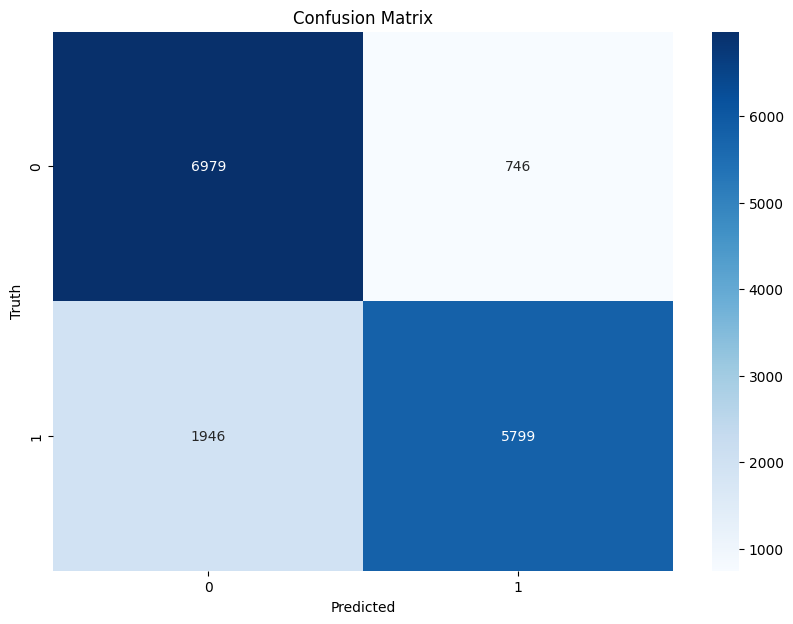

In [67]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
rf_accuracy = accuracy_score(y_test, y_rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy}")

In [66]:
rf_report = classification_report(y_test, y_pred, zero_division=0)

print("Random Forest Classification Report:")
print(rf_report)

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.90      0.84      7725
           1       0.89      0.75      0.81      7745

    accuracy                           0.83     15470
   macro avg       0.83      0.83      0.82     15470
weighted avg       0.83      0.83      0.82     15470



In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

model = RandomForestClassifier(
    n_estimators=500, criterion="entropy", max_depth=30, max_features=X_train.shape[1], verbose=""
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.90      0.84      7725
           1       0.89      0.75      0.81      7745

    accuracy                           0.83     15470
   macro avg       0.83      0.83      0.82     15470
weighted avg       0.83      0.83      0.82     15470



### Gradient Boosting Classifier

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier()
gb_model.fit(X_train_sm, y_train_sm)

y_gb_pred = gb_model.predict(X_test)

gb_accuracy = accuracy_score(y_test, y_gb_pred)
gb_report = classification_report(y_test, y_gb_pred, zero_division=0)

print(f"Gradient Boosting Accuracy: {gb_accuracy}")
print("Gradient Boosting Classification Report:")
print(gb_report)

Gradient Boosting Accuracy: 0.7354819691461137
Gradient Boosting Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.94      0.84      7658
           1       0.39      0.12      0.18      2519

    accuracy                           0.74     10177
   macro avg       0.58      0.53      0.51     10177
weighted avg       0.67      0.74      0.68     10177



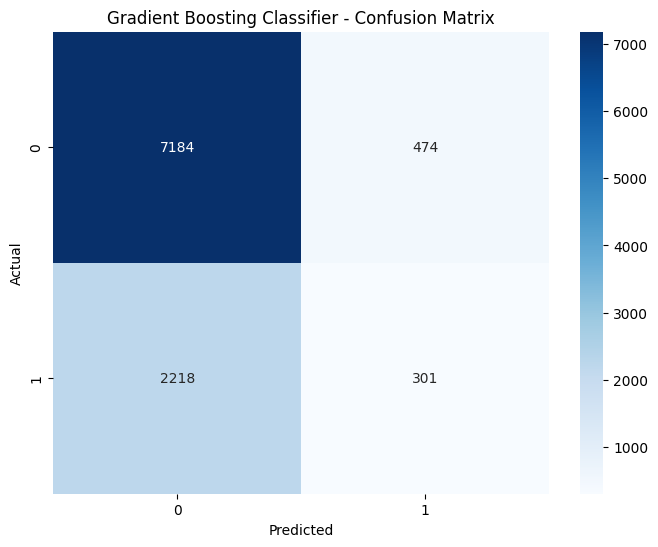

In [184]:
# Plot Confusion Matrix for Gradient Boosting Classifier
gb_cm = confusion_matrix(y_test, y_gb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    gb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1]
)
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### XGBoost Classifier 

In [179]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train_sm, y_train_sm)

y_xgb_pred = xgb_model.predict(X_test)

xgb_accuracy = accuracy_score(y_test, y_xgb_pred)
xgb_report = classification_report(y_test, y_xgb_pred, zero_division=0)

print(f"XGBoost Accuracy: {xgb_accuracy}")
print("XGBoost Classification Report:")
print(xgb_report)

In [ ]:
# Plot Confusion Matrix for XGBoost Classifier
xgb_cm = confusion_matrix(y_test, y_xgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    xgb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1]
)
plt.title("XGBoost Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### LightGBM Classifier

In [180]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier()
lgb_model.fit(X_train_sm, y_train_sm)

y_lgb_pred = lgb_model.predict(X_test)

lgb_accuracy = accuracy_score(y_test, y_lgb_pred)
lgb_report = classification_report(y_test, y_lgb_pred, zero_division=0)

print(f"LightGBM Accuracy: {lgb_accuracy}")
print("LightGBM Classification Report:")
print(lgb_report)

[LightGBM] [Info] Number of positive: 30458, number of negative: 30458
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001145 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2583
[LightGBM] [Info] Number of data points in the train set: 60916, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


In [ ]:
# Plot Confusion Matrix for LightGBM Classifier
lgb_cm = confusion_matrix(y_test, y_lgb_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    lgb_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1]
)
plt.title("LightGBM Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

### Voting Classifier

In [181]:
from sklearn.ensemble import VotingClassifier

# Voting Classifier
clf1 = GradientBoostingClassifier()
clf2 = XGBClassifier()
clf3 = LGBMClassifier()

eclf = VotingClassifier(
    estimators=[("gb", clf1), ("xgb", clf2), ("lgb", clf3)], voting="soft"
)

eclf.fit(X_train_sm, y_train_sm)

y_eclf_pred = eclf.predict(X_test)

eclf_accuracy = accuracy_score(y_test, y_eclf_pred)
eclf_report = classification_report(y_test, y_eclf_pred, zero_division=0)

print(f"Voting Classifier Accuracy: {eclf_accuracy}")
print("Voting Classifier Classification Report:")
print(eclf_report)

[LightGBM] [Info] Number of positive: 30458, number of negative: 30458
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001203 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2583
[LightGBM] [Info] Number of data points in the train set: 60916, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Voting Classifier Accuracy: 0.7514984769578461
Voting Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.98      0.86      7658
           1       0.49      0.07      0.12      2519

    accuracy                           0.75     10177
   macro avg       0.62      0.52      0.49     10177
weighted avg       0.69      0.75      0.67     10177



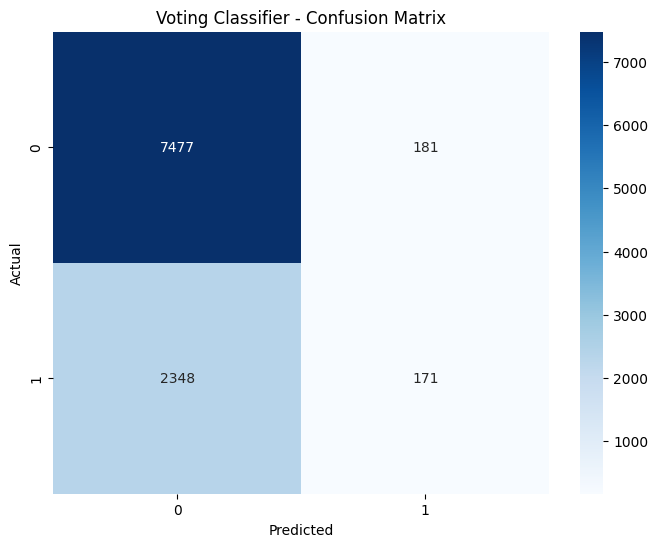

In [182]:
# Plot Confusion Matrix for Voting Classifier
eclf_cm = confusion_matrix(y_test, y_eclf_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(
    eclf_cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1]
)
plt.title("Voting Classifier - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()